# RAO3 Algorithm

Name    : Anaz Akbar Azhar <br>
SID     : 1301213291

# kode

import library yang dibutuhkan

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Fungsi F9

In [25]:
def F14(x):
    aS = np.array([
        [-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
    ])
    bS = np.sum((x[:, np.newaxis] - aS.T) ** 6, axis=2)
    return (1 / 500 + np.sum(1 / (np.arange(1, 26) + bS), axis=1)) ** -1

## Parameter

Parameter di dalam firefly algorithm ada berapa jenis seperti yang dijelaskan di bawah ini

In [26]:
# Inisialisasi parameter-parameter algoritma
n_candidates = 40  # Ukuran populasi
max_iterations = 50  # Jumlah iterasi maksimum
x_range = (-50, 100)  # Rentang untuk populasi awal

In [19]:
# Inisialisasi populasi awal secara acak
np.random.seed(42)
population = np.random.uniform(x_range[0], x_range[1], (n_candidates, 2))

In [20]:
# Fungsi untuk menghitung fitness dari populasi
def calculate_fitness(population):
    return np.array([F14(individual.reshape(1, -1)) for individual in population])

In [21]:
# Inisialisasi fitness populasi awal
fitness = calculate_fitness(population)
print(fitness)

[[499.99996588]
 [499.99887409]
 [494.58529257]
 [499.99991705]
 [499.99787777]
 [499.99997967]
 [499.99979783]
 [497.67388478]
 [471.03851749]
 [495.72112746]
 [499.66914878]
 [495.96644696]
 [499.99948964]
 [485.98872322]
 [499.86583899]
 [499.40476692]
 [499.99997185]
 [499.99998607]
 [469.80014822]
 [499.99073857]
 [498.01628277]
 [499.99995678]
 [499.97873719]
 [456.14249086]
 [495.60342999]
 [499.99998506]
 [499.99998808]
 [499.99996035]
 [488.06359127]
 [499.84266901]
 [498.00981565]
 [499.9997556 ]
 [498.04515796]
 [499.99969585]
 [499.99998164]
 [499.99933925]
 [499.9998463 ]
 [499.9994337 ]
 [499.99953982]
 [425.81619447]]


## RAO3 Algorithm

In [22]:
# RAO3 setup 
def rao_v3(population, fitness):
    history = [] # List untuk menyimpan populasi pada setiap iterasi
    for _ in range(max_iterations):
        new_population = np.copy(population) # Salin populasi saat ini untuk penggunaan dalam iterasi ini
        for i in range(n_candidates):
            r1 = np.random.random()
            r2 = np.random.random()
            best = population[np.argmin(fitness)]
            worst = population[np.argmax(fitness)]
            random_individual = population[np.random.randint(0, n_candidates)]
            
            # Update aturan dimodifikasi sesuai dengan formula
            new_population[i] = population[i] + \
                                r1 * (best - np.abs(worst)) + \
                                r2 * (np.logical_or(population[i], random_individual) - population[i])
            
            # Memastikan batas tetap terjaga
            new_population[i] = np.clip(new_population[i], x_range[0], x_range[1])
        
        # Evaluasi populasi baru
        new_fitness = calculate_fitness(new_population)
        
        # Ganti populasi lama dengan yang baru jika lebih baik
        for j in range(n_candidates):
            if new_fitness[j] < fitness[j]:
                population[j] = new_population[j]
                fitness[j] = new_fitness[j]
        
        history.append(population.copy())
    
    return population, history

In [23]:
final_population, history = rao_v3(population, fitness)

## Buat GIF dari data yang telah ada

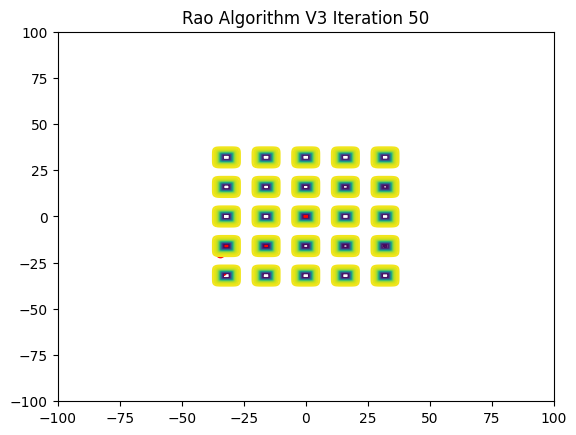

In [24]:
# Persiapkan data plot kontur
bounds = (-100, 100)
X1 = np.linspace(bounds[0], bounds[1], 400)
X2 = np.linspace(bounds[0], bounds[1], 400)
X1, X2 = np.meshgrid(X1, X2)
Z = F14(np.column_stack([X1.ravel(), X2.ravel()])).reshape(X1.shape)

# Atur gambar dan sumbu untuk animasi
fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[1])
ax.set_ylim(bounds[0], bounds[1])
contour = ax.contour(X1, X2, Z, levels=50)
scatter = ax.scatter([], [], c='red')  # Kandidat solusi

# Fungsi pembaruan untuk animasi
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'Rao Algorithm V3 Iteration {frame + 1}')
    return scatter,

ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

writer = PillowWriter(fps=5)  # Adjust fps for speed preference
ani.save("rao_algorithm_v3_1301213291.gif", writer=writer)
plt.show()